In [366]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot
import pylab
import random

In [367]:
def Kernel(X1, X2, gamma, l=0.2,):
    
    a = np.sum(X1,1).reshape(-1, 1)
    b = np.sum(X2,1)
    absval = abs((a - b) / l)
    return np.exp(-1*np.power(absval,gamma))

In [368]:
def posterior_predictive(X_s, X_train, Y_train, gamma = 2,lamda = 0.1*0.1):
    K_s = Kernel(X_train, X_s,gamma)
    K_inv = inv(Kernel(X_train, X_train,gamma) + lamda * np.eye(len(X_train)))
    K_ss = Kernel(X_s, X_s,gamma)
 
    mu = mdot([K_s.T,K_inv,Y_train])
    
    cov = K_ss - mdot([K_s.T,K_inv,K_s])
    var = np.diagonal(cov).reshape(-1, 1)
    return X_s,mu,var,cov

In [369]:
def Noisy_posterior_predictive(X_s, X_train, Y_train,gamma = 2, sigma=0.1,lamda = 0.1*0.1):
    K_s = Kernel(X_train, X_s,gamma)
    K_inv = inv(Kernel(X_train, X_train,gamma) + lamda * np.eye(len(X_train)))
    K_ss = Kernel(X_s, X_s,gamma)
 
    mu = mdot([K_s.T,K_inv,Y_train])
    
    cov = K_ss - mdot([K_s.T,K_inv,K_s]) + (sigma*sigma)
    var = np.diagonal(cov).reshape(-1, 1)
    print(cov.shape,var.shape)
    return X_s,mu,var,cov

In [370]:
X_data = np.array([-0.5,0.5]).reshape(-1, 1)
y_data = np.array([0.3,-0.1]).reshape(-1, 1)

In [371]:
def plotgraph(prediction,title):
    #plt.scatter(X_data, y_data, s = 5,marker='+')
    plt.plot(prediction[0],prediction[1])
    plt.plot(prediction[0],prediction[1]+prediction[2])
    plt.plot(prediction[0],prediction[1]-prediction[2])
    plt.title(title)
    y = np.random.multivariate_normal(prediction[1].ravel(),prediction[3])
    plt.plot(prediction[0],y)

In [372]:
x_guess = np.arange(-1, 1, 0.02).reshape(-1, 1)

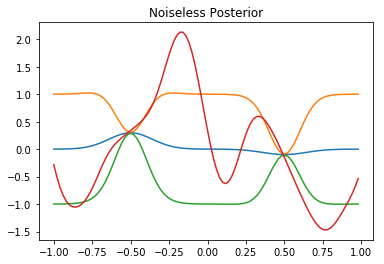

In [373]:
prediction = posterior_predictive(x_guess, X_data, y_data)
plotgraph(prediction,"Noiseless Posterior")

(100, 100) (100, 1)
(100, 1) (100, 1) (100, 1)


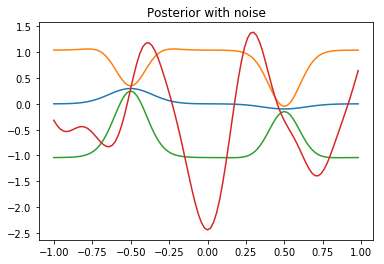

In [374]:
prediction = Noisy_posterior_predictive(x_guess, X_data, y_data,2,0.2)
print(prediction[0].shape,prediction[1].shape,prediction[2].shape)
plotgraph(prediction,"Posterior with noise")

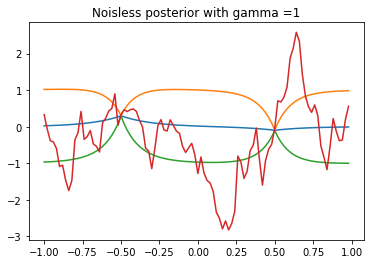

In [375]:
prediction = posterior_predictive(x_guess, X_data, y_data,1)
plotgraph(prediction,"Noisless posterior with gamma =1")

(100, 100) (100, 1)


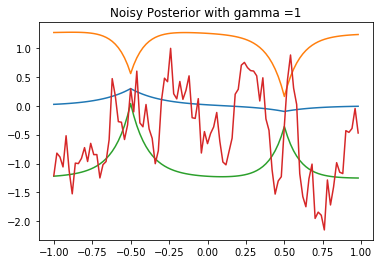

In [376]:
prediction = Noisy_posterior_predictive(x_guess, X_data, y_data,1,0.5)
plotgraph(prediction,"Noisy Posterior with gamma =1")